# 1. Data Collection

## 1.1 Crawling Url

In [4]:
#crawling urls from the search result by each page
#adjusted from https://github.com/catSirup/naver_kin_crawling
from selenium import webdriver
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import time
import requests
from selenium.webdriver.common.by import By

  
def url_crawl(st, end, year):
    chromedriver_dir = r'chromedriver.exe'
    driver = webdriver.Chrome(chromedriver_dir)

    MAX_SLEEP_TIME = 1
    driver.get('https://kin.naver.com/search/list.nhn?query=재활용')
    rand_value = randint(1, 3)
    time.sleep(rand_value)

    page_index = 1
    period_txt = "&period=" + st + ".%7C" + end + "."

    date = str(datetime.now()).replace('.', '_')
    date = date.replace(' ', '_')
    
    with open(year+"_url_list.txt", 'a') as f:
        print(period_txt)
        page_url = []
        while True:
            rand_value = randint(1, 3)
            time.sleep(rand_value)
            url = 'https://kin.naver.com/search/list.nhn?' + "&sort=date" + '&query=재활용' + period_txt + "&section=kin" + "&page=" + str(page_index)
            driver.get(url)
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')

            tags = soup.find_all('a', class_="_nclicks:kin.txt _searchListTitleAnchor")
            for tag in tags:
                url = str(tag).split(' ')[3]
                url = url.replace('href=', "")
                url = url.replace('"', "")
                url = url.replace('amp;', '')
                page_url.append(url)
                f.write(url + "\n")

            driver.implicitly_wait(15)
            post_number = driver.find_element(By.CLASS_NAME,'number').text
            post_number = str(post_number).replace("(", "")
            post_number = str(post_number).replace(")", "")

            current_number = post_number.split('/')[0].split('-')[1]
            current_number = current_number.replace(',', '')
            total_number = post_number.split('/')[1]
            total_number = total_number.replace(',', '')

            if int(current_number) == int(total_number):
                break
            else:
                page_index += 1

'''#getting search results from year 2017~2021
std = ['01.01','02.01','03.01','04.01','05.01','06.01','07.01','08.01','09.01','10.01','11.01','12.01']
endd = ['01.31','02.28','03.31','04.30','05.31','06.30','07.31','08.31','09.30','10.31','11.30','12.31']
year = ['2017.','2018.','2019.','2021.']
for y in year:
    for st, end in zip(std, endd):
        url_crawl(y+st, y+end, y)'''
        
# 2020 is a leap year    
std = ['01.01','02.01','03.01','04.01','05.01','06.01','07.01','08.01','09.01','10.01','11.01','12.01']
endd = ['01.31','02.29','03.31','04.30','05.31','06.30','07.31','08.31','09.30','10.31','11.30','12.31']
y = '2020.'
for st, end in zip(std, endd):
    url_crawl(y+st, y+end, y[:-1])

<ipython-input-4-0725bdbe0d32>:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chromedriver_dir)


&period=2020.01.01.%7C2020.01.31.
&period=2020.02.01.%7C2020.02.29.
&period=2020.03.01.%7C2020.03.31.
&period=2020.04.01.%7C2020.04.30.
&period=2020.05.01.%7C2020.05.31.
&period=2020.06.01.%7C2020.06.30.
&period=2020.07.01.%7C2020.07.31.
&period=2020.08.01.%7C2020.08.31.
&period=2020.09.01.%7C2020.09.30.
&period=2020.10.01.%7C2020.10.31.
&period=2020.11.01.%7C2020.11.30.
&period=2020.12.01.%7C2020.12.31.


## 1.2 Crawling data from Urls

In [6]:
import glob, os

file_list = ['2017_url_list.txt','2018_url_list.txt','2019_url_list.txt','2020_url_list.txt','2021_url_list.txt']

with open('merge.txt', 'w') as outfile:
    for filename in file_list:
        with open(filename) as file:
            for line in file:
                outfile.write(line)

In [ ]:
#crawl questions from each url
import random
import pandas as pd
import time
from tqdm import tqdm

chromedriver_dir = r'chromedriver.exe'
driver = webdriver.Chrome(chromedriver_dir)

count = 0
MAX_SLEEP_TIME = 4
tl = [] #title list
dl=[] #date list
ql=[] #question list

with open('merge.txt','r') as f:
    page_url = f.readlines()
    
for i in tqdm(page_url):
    rand_value = randint(1, MAX_SLEEP_TIME)
    time.sleep(rand_value)
    driver.get(i[:-1])
    
    try:
        nav = driver.find_element(By.XPATH, '//*[@id="au_lnb"]/li[2]/a')
    except:
        continue
        
    aria = nav.get_attribute('aria-current')
    if aria != 'page':
        continue
    
    title = driver.find_element(By.CLASS_NAME,'title').text
    try:
        question_txt = driver.find_element(By.CLASS_NAME,'c-heading__content').text
        date = driver.find_element(By.CLASS_NAME,'c-userinfo__info').text     
    except:
        question_txt = ""
        date = ""
        
    tl.append(title)
    dl.append(date)
    ql.append(question_txt)
    
df = pd.DataFrame(columns=['date', 'title','question'])
df['date'] = dl
df['title'] = tl
df['question'] = ql

df.to_csv('data_2017_2021.csv')

# 2. Data Preprocessing

## 2.1 Data Preparation

In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv('data_2017_2021.csv')

In [68]:
date = df['date'].to_list()
year = []

for i in range(len(date)):
    date[i] = str(date[i]).replace('작성일\n','')
    year.append(date[i][:4])

df['date'] = date
df['year'] = year
df = df[['year','date','title','question']]

In [69]:
df

,year,date,title,question
0,2017,2017.02.01,닭 기름 요리,삼겹살 기름으로 김치볶음밥을 만들 수 있는데\n닭 기름은 어떤 요리에 쓰일 수 있나...
1,2017,2017.01.31,우체국택배,제가 우체국을한번도안가봐서 궁금한게많네요ㅠ\n밑에 질문에 답변 부탁드려요\n\n1 ...
2,2017,2017.01.31,GTA5랑 오버워치 렉 없이 할 수 있을까요?,\n\n\n 이 컴퓨터로 GTA5랑 오버워치 렉 없이 할 수 있을까요?\n아니면 ...
3,2017,2017.01.31,생쌀은 음식물 쓰레기인가요?,생쌀및 잡곡류가 음식물 쓰레기인가요?\n오래된 쌀과 잡곡이 있는데 버려야해요\n찾아...
4,2017,2017.01.31,영어 한문장 해석좀요,"in your opinion, is the following statement tr..."
...,...,...,...,...
62193,2021,2021.11.30,폴란드 벨라루스 난민 문제에 대해 알려주세요!,자세하게 빨리부탁드려요!!
62194,2021,2021.11.30,친환경 제품을 사용하는나라,친환경 제품을 사용하는 나라가 어디어디 있는지 궁금해요. 어떤 나라가있나요?
62195,2021,2021.11.30,스치로풀 페기처리질문,벽 외벽에 단열제로 붙어있는\n스치로풀 처리방법좀\n알려주세요 뽀개서 자른후\n페기...
62196,2021,2021.11.30,분리되는 벤치프레스 의자 버리는법 (사진있음),이런식으로 되어있는건데 운동기구들은 뭐 스티커 붙혀서 버려야한다는데 이런식으로 분...


In [75]:
df17 = df[df['year'] =='2017']
df18 = df[df['year'] =='2018']
df19 = df[df['year'] =='2019']
df20 = df[df['year'] =='2020']
df21 = df[df['year'] =='2021']

In [77]:
#drop duplicated data & delete data with wrong dates
def df_mod(df, year):
    #drop duplicates
    df = df.drop_duplicates(['title'])
    df = df.drop_duplicates(['question'])
    df = df.reset_index()
    df = df[['date','title','question']]
    
    #drop wrong dates
    dl = df['date'].to_list()
    for i in range(len(dl)):
        #dl[i] = str(dl[i])[4:]
        if dl[i][:4] != year:
            dl[i] = 'notyear'
    df['date'] = dl
    
    return df

df17 = df_mod(df17,'2017')
df18 = df_mod(df18,'2018')
df19 = df_mod(df19,'2019')
df20 = df_mod(df20,'2020')
df21 = df_mod(df21,'2021')

In [78]:
# dataframe length by year after dropping
print(len(df17)-len(df17[df17['date']=='notyear']))
print(len(df18)-len(df18[df18['date']=='notyear']))
print(len(df19)-len(df19[df19['date']=='notyear']))
print(len(df20)-len(df20[df20['date']=='notyear']))
print(len(df21)-len(df21[df21['date']=='notyear']))

6127
3897
5231
8578
8281


In [80]:
d17 = df17[df17['date']!='notyear']
d18 = df18[df18['date']!='notyear']
d19 = df19[df19['date']!='notyear']
d20 = df20[df20['date']!='notyear']
d21 = df21[df21['date']!='notyear']

In [285]:
d17.to_csv('d17.csv')
d18.to_csv('d18.csv')
d19.to_csv('d19.csv')
d20.to_csv('d20.csv')
d21.to_csv('d21.csv')

In [81]:
#combine title data with question data
d17['add'] = d17['title']+' '+ d17['question']
d18['add'] = d18['title']+' '+ d18['question']
d19['add'] = d19['title']+' '+ d19['question']
d20['add'] = d20['title']+' '+ d20['question']
d21['add'] = d21['title']+' '+ d21['question']

In [82]:
# keyword for filtering the dataset was listed
# by setting these keywords, we can only select the data which are related to the topic
with open('recycle_filter.txt','r', encoding='utf-8') as f:
    keywords = f.read().split('\n')
    
keywords

['어떻게 버리',
 '어떻게 버려',
 '일반쓰레기',
 '음식물쓰레기',
 '분리배출',
 '배출',
 '버리기',
 '버리려',
 '버려도',
 '종량제',
 '쓰레기 어떻게',
 '어디로 분리',
 '어디에 버리',
 '무슨 쓰레기',
 '일회용품',
 '재활용',
 '버릴',
 '분리수거',
 '버리는',
 '일회용',
 '1회용']

In [83]:
with open('recycle_filter.txt','r', encoding='utf-8') as f:
    keywords = f.read().split('\n')

def is_re(df):
    is_re = []
    L = df['add'].to_list()
    for l in L:
        cnt = 0
        for k in keywords:
            if k in l:
                cnt += 1
        if cnt == 0:
            is_re.append('not')
        else:
            is_re.append('re')
    return is_re
    
    
d17['is_re'] = is_re(d17)
d18['is_re'] = is_re(d18)
d19['is_re'] = is_re(d19)
d20['is_re'] = is_re(d20)
d21['is_re'] = is_re(d21)

In [84]:
print(len(d17[d17['is_re'] == 're']),len(d18[d18['is_re'] == 're']),len(d19[d19['is_re'] == 're']),len(d20[d20['is_re'] == 're']),len(d21[d21['is_re'] == 're']))

3003 1836 2582 4286 3962


In [85]:
re17 = d17[d17['is_re'] == 're']
re18 = d18[d18['is_re'] == 're']
re19 = d19[d19['is_re'] == 're']
re20 = d20[d20['is_re'] == 're']
re21 = d21[d21['is_re'] == 're']

## 2.2 Text preprocessing

In [86]:
#pre processing
import re
import math

def cleansing_rp(text):
    repl = ' '
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
    text = re.sub(pattern= pattern, repl=repl, string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'
    text = re.sub(pattern= pattern, repl=repl, string=text)
    pattern = '[^\w\s]'
    text = re.sub(pattern= pattern, repl=repl, string=text)
    pattern = '<[^>]*>'
    text = re.sub(pattern = pattern, repl=' ',string=text)
    pattern = '[0-9]'
    text = re.sub(pattern = pattern, repl=' ',string=text)
    pattern = '[a-zA-Z]'
    text = re.sub(pattern = pattern, repl=' ',string=text)
    pattern = '[一-龥]'
    text = re.sub(pattern= pattern, repl=repl, string=text)
    pattern = '[0-9]{4}년'
    text = re.sub(pattern= pattern, repl=repl, string=text)
    pattern = '[0-9]월'
    text = re.sub(pattern= pattern, repl=repl, string=text)
    pattern = '[0-9]일'
    text = re.sub(pattern= pattern, repl=repl, string=text)

    return text

def replace(input):
    sentences = []
    for c in input:
        try:
            sentences.append(cleansing_rp(c.replace("\n", " ").replace("\r", " ")))
        except:
            sentences.append('None')

    if len(input) == len(sentences):
        return sentences
    else:
        return sentences


def main(df):
    df['t_tok'] = replace(df['title'].to_list())
    df['tok'] = replace(df['add'].to_list())

df_list = [re17, re18, re19, re20, re21]
for d in df_list:
    main(d)
    d = d[['is_re','title','question','add','t_tok','tok']]

<ipython-input-86-b812a08f5f81>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t_tok'] = replace(df['title'].to_list())
<ipython-input-86-b812a08f5f81>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tok'] = replace(df['add'].to_list())


In [87]:
re17

,date,title,question,add,is_re,t_tok,tok
3,2017.01.31,생쌀은 음식물 쓰레기인가요?,생쌀및 잡곡류가 음식물 쓰레기인가요?\n오래된 쌀과 잡곡이 있는데 버려야해요\n찾아...,생쌀은 음식물 쓰레기인가요? 생쌀및 잡곡류가 음식물 쓰레기인가요?\n오래된 쌀과 잡...,re,생쌀은 음식물 쓰레기인가요,생쌀은 음식물 쓰레기인가요 생쌀및 잡곡류가 음식물 쓰레기인가요 오래된 쌀과 잡곡...
4,2017.01.31,영어 한문장 해석좀요,"in your opinion, is the following statement tr...","영어 한문장 해석좀요 in your opinion, is the following ...",re,영어 한문장 해석좀요,영어 한문장 해석좀요 ...
7,2017.01.31,안쓰는 가구 및 가전제품 처리방법 질문입니다.,집에 안쓰고 방치된 물건이 너무 많아서 일단 생각나는 대로 목록을 써봤습니다.\n생...,안쓰는 가구 및 가전제품 처리방법 질문입니다. 집에 안쓰고 방치된 물건이 너무 많아...,re,안쓰는 가구 및 가전제품 처리방법 질문입니다,안쓰는 가구 및 가전제품 처리방법 질문입니다 집에 안쓰고 방치된 물건이 너무 많아...
11,2017.01.31,나일론 66 제거 방법이 궁금합니다.\n\n철제 부품에 나일론 66 재질을 사출하여...,... 시 재활용 가능한가요!? 사이즈는 그렇게 크지... 미국에서 물건 수입시 같...,나일론 66 제거 방법이 궁금합니다.\n\n철제 부품에 나일론 66 재질을 사출하여...,re,나일론 제거 방법이 궁금합니다 철제 부품에 나일론 재질을 사출하여 입...,나일론 제거 방법이 궁금합니다 철제 부품에 나일론 재질을 사출하여 입...
12,2017.01.31,HDD의 응답속도가 0MB/s인 제품은 뭐가고장난건가요?,\n 위 사진과 같이 베드섹터는 0인데 가운데부분 응답속도가 굉장히 느린 섹터들이...,HDD의 응답속도가 0MB/s인 제품은 뭐가고장난건가요? \n 위 사진과 같이 베...,re,의 응답속도가 인 제품은 뭐가고장난건가요,의 응답속도가 인 제품은 뭐가고장난건가요 위 사진과 같이 베드...
...,...,...,...,...,...,...,...
6106,2017.12.22,Lg pdp 42인치 tv입니다..열받으면 꺼지는증상,한참 보고있으면 화면이 꺼집니다..그냥은 안켜지고..전원코드를 뺏다가 다시 꼽으면 ...,Lg pdp 42인치 tv입니다..열받으면 꺼지는증상 한참 보고있으면 화면이 꺼집니...,re,인치 입니다 열받으면 꺼지는증상,인치 입니다 열받으면 꺼지는증상 한참 보고있으면 화면이 꺼집니...
6111,2017.11.09,합법음식물처리기,한국상하수도협회에서 하수구배출이 가능한 합법적인 음식물처리기 추천해주세요. 수거 조...,합법음식물처리기 한국상하수도협회에서 하수구배출이 가능한 합법적인 음식물처리기 추천해...,re,합법음식물처리기,합법음식물처리기 한국상하수도협회에서 하수구배출이 가능한 합법적인 음식물처리기 추천해...
6113,2017.02.18,장백 거영 가마솥국밥집에 대해....,안녕하세요..\n장백 거영 가마솥 국밥집에 대해 글 올립니다...\n다른게 아니...,장백 거영 가마솥국밥집에 대해.... 안녕하세요..\n장백 거영 가마솥 국밥집에...,re,장백 거영 가마솥국밥집에 대해,장백 거영 가마솥국밥집에 대해 안녕하세요 장백 거영 가마솥 국밥집에 ...
6114,2017.02.17,집에서 조개구이를 먹을수있게하는 도구를 알려주세요,아래사진은 집에서 조개구이를 먹을수 있게 해주는 도구인데요.근데 이도구의 이름을 몰...,집에서 조개구이를 먹을수있게하는 도구를 알려주세요 아래사진은 집에서 조개구이를 먹을...,re,집에서 조개구이를 먹을수있게하는 도구를 알려주세요,집에서 조개구이를 먹을수있게하는 도구를 알려주세요 아래사진은 집에서 조개구이를 먹을...


### Noun extraction

In [88]:
from konlpy.tag import Okt 
import numpy as np
okt = Okt()

In [4]:
import pandas as pd
re17 = pd.read_csv('re17.csv')
re18 = pd.read_csv('re18.csv')
re19 = pd.read_csv('re19.csv')
re20 = pd.read_csv('re20.csv')
re21 = pd.read_csv('re21.csv')

In [89]:
from tqdm import tqdm
import time

def n_extract(df):
    contents = df['tok'].to_list()
    for i in range(len(contents)):
        contents[i] = str(contents[i])
        
    noun_tokenized = []
    for i in tqdm(range(0, len(contents))):
        #time.sleep(0.05)
        contents[i] = okt.nouns(str(contents[i]))
        token_list = []
        for t in contents[i]:
            if len(t) > 1:
                token_list.append(t)
        noun_tokenized.append(token_list)

    noun_tok = []
    for i in range(len(noun_tokenized)):
        txt = ' '.join(noun_tokenized[i])
        noun_tok.append(txt)
    
    df['noun_tok'] = noun_tok

n_extract(re17)
n_extract(re18)
n_extract(re19)
n_extract(re20)
n_extract(re21)

100%|█████████████████████████████████████████████████████████████████████████████| 1836/1836 [00:14<00:00, 126.89it/s]
<ipython-input-89-7a92decab720>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['noun_tok'] = noun_tok
100%|█████████████████████████████████████████████████████████████████████████████| 3962/3962 [00:20<00:00, 191.37it/s]


In [45]:
re17.to_csv('re17.csv')
re18.to_csv('re18.csv')
re19.to_csv('re19.csv')
re20.to_csv('re20.csv')
re21.to_csv('re21.csv')

# 3. Data Analysis

## 3.1 Text Complexity

In [91]:
# Korean Language Education Vocabulary defined by The National Institute of the Korean Language
# by adapting these vocabularies to Dale-Chall formula, we can define the range of 'difficult words'
vocab = pd.read_excel('한국어교육어휘.xlsx')

In [92]:
v = vocab[(vocab['등급'] == '중급')|(vocab['등급'] == '고급')]
v = v[v['품사'] == '명사']
v = v[['등급','어휘']]

In [95]:
def v_text(df):
    vlist = df['어휘'].to_list()
    for v in range(len(vlist)):
        vlist[v] = "".join(re.findall("[ㄱ-ㅣ가-힣]+", vlist[v]))
    df['어휘'] = vlist
    
    return df
    

V = v_text(v).reset_index()[['등급','어휘']]
V

,등급,어휘
0,고급,가
1,고급,가계
2,고급,가곡
3,고급,가공
4,고급,가구
...,...,...
5868,고급,희로애락
5869,중급,희생
5870,중급,희생
5871,고급,희소식


In [137]:
#calculating complexity scores(Rd) for each year's data
from tqdm import tqdm
import time
import kss

def comp_cal(s, vlist):
    cnt = 0
    for i in vlist:
        for v in s:
            cnt += v.count(s)     
    return cnt


def calculate(df):
    n = 0
    df_noun = df['noun_tok'].to_list()
    df_add = df['add'].to_list()
    vlist = V['어휘']
    rd_add = 0
    
    for i in tqdm(range(len(df))):
        if (str(df_noun[i]) == 'nan') | (len(str(df_noun[i])) == 0):
            n += 1
            continue
        elif str(df_add[i]) == 'nan':
            n += 1
            continue

        comp = comp_cal(df_noun[i], vlist)
        w = len(df_noun[i].split())
        try:
            sent = len(kss.split_sentences(df_add[i].replace('\n','').replace('\s','')))
        except:
            n += 1 
            continue
            
        Rd = 0.1579*(comp/w * 100) + 0.0496*(w/sent) + 3.6365
        rd_add += Rd
        
    return rd_add, n

rd17, n17 = calculate(re17)
cal17 = rd17 / (len(re17) - n17)

rd18, n18 = calculate(re18)
cal18 = rd18 / (len(re18) - n18)

rd19, n19 = calculate(re19)
cal19 = rd19 / (len(re19) - n19)

rd20, n20 = calculate(re20)
cal20 = rd20 / (len(re20) - n20)

rd21, n21 = calculate(re21)
cal21 = rd21 / (len(re21) - n21)

100%|████████████████████████████████████████████████████████████████████████████| 3962/3962 [1:35:42<00:00,  1.45s/it]


In [146]:
print(cal17, cal18, cal19, cal20, cal21)

3.9464297151350296 3.9651452961616003 3.9586410601901236 3.9483498935679617 3.9469624862705386


## 3.2 Text Entropy

In [30]:
!pip install kss --upgrade

In [141]:
from tqdm import tqdm
import time
from math import log2

#preprocessing the dataset as dictionary form for entropy formula
def word_dic(s):
    word_dic = {}
    for w in s.split():
        if w in word_dic.keys():
            word_dic[w] += 1
        else:
            word_dic[w] = 1
            
    return word_dic

#calculating shannon entropy
def shannon(boe):
    total = sum(list(boe.values())) 
    return sum(freq / total * log2(total / freq) for freq in boe.values())

#main function
def entropy_main(df):
    n = 0
    df_noun = df['noun_tok'].to_list()
    rd_add = 0

    for i in tqdm(range(len(df))):
        if str(df_noun[i]) == 'nan':
            n += 1
            continue
        wd = word_dic(df_noun[i])
        entro = shannon(wd)
        
    return entro
    
e17 = entropy_main(re17)
e18 = entropy_main(re18)
e19 = entropy_main(re19)
e20 = entropy_main(re20)
e21 = entropy_main(re21)

  0%|                                                                                         | 0/3003 [00:00<?, ?it/s]<ipython-input-141-d49b305c8767>:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return sum(freq / total * log2(total / freq) for freq in boe.values())
100%|███████████████████████████████████████████████████████████████████████████| 3962/3962 [00:00<00:00, 31516.92it/s]


In [148]:
print(e17, e18, e19, e20, e21)

3.4790795706241733 3.5840123702119344 4.349191770915039 3.875 3.3927474104487847


## 4. Time series visualization

In [142]:
from sklearn.preprocessing import minmax_scale
from pylab import *

Text(0.5, 0, 'year')

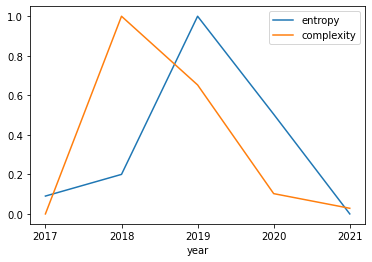

In [147]:
# entropy and complexity were normalized by minmaxscale
year = ['2017','2018','2019','2020','2021']
e = [e17, e18, e19, e20, e21]
c = [cal17, cal18, cal19, cal20, cal21]

plt.plot(year, minmax_scale(e))
plt.plot(year, minmax_scale(c))
plt.legend(['entropy','complexity'])
plt.xlabel('year')